In [ ]:
import os 
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab.patches import cv2_imshow
#/content/drive/MyDrive/data/data.pickle

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=d43cf74d5fbd7e13c8abfdfebad9ec4d6fdb5d964ce8deb33fdf532056ff9396
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.4 GB  | Proc size: 845.6 MB
GPU RAM Free: 11317MB | Used: 124MB | Util   1% | Total 11441MB


In [ ]:
i=int(1) 


In [ ]:
data_dir = '/content/drive/MyDrive/archiveofflower/flowers/flowers'

categories = ['daisy','dandelion','rose','sunflower','tulip']
data = []

def make_data():
  for category in categories:
    global i 
    print(i)
    i=i+1;
    path = os.path.join(data_dir,category)
    label = categories.index(category)
    for img_name in os.listdir(path):
      image_path = os.path.join(path,img_name)
      image = cv2.imread(image_path)
      try:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224,224))
        image = np.array(image,dtype=np.float32)
        data.append([image,label])
      except Exception as e:
        pass
  #pik = open('data.pickle','wb')
  with open('/content/drive/MyDrive/data/data.pickle', 'wb') as f:
     pickle.dump(data, f)
       #pickle.dump(data,pik)
     f.close()




make_data()

2
3
4
5
6


In [ ]:
def load_data():
  np.random.shuffle(data)
  feature = []
  labels = []
  for img,label in data:
    feature.append(img)
    labels.append(label)
  feature = np.array(feature,dtype=np.float32)
  labels = np.array(labels)
  feature = feature/255.0
  return [feature,labels]

In [ ]:
(features,labels) = load_data()
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.1)
categories = ['daisy','dandelion','rose','sunflower','tulip']

In [ ]:
X_train.shape

(3890, 224, 224, 3)

In [ ]:
input_layer = tf.keras.layers.Input([224,224,3])
conv1 = tf.keras.layers.Conv2D(filters = 32,kernel_size=(5,5),padding='Same',activation='relu')(input_layer)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(filters = 64,kernel_size=(3,3),padding='Same',activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv2)
conv3 = tf.keras.layers.Conv2D(filters = 96,kernel_size=(3,3),padding='Same',activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv3)
conv4 = tf.keras.layers.Conv2D(filters = 96,kernel_size=(3,3),padding='Same',activation='relu')(pool3)
pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2))(conv4)
flt1 = tf.keras.layers.Flatten()(pool4)
dn1 = tf.keras.layers.Dense(512,activation='relu')(flt1)
out = tf.keras.layers.Dense(5,activation='softmax')(dn1)

model = tf.keras.Model(input_layer,out)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
39/39 [==============================] - 49s 396ms/step - loss: 1.6899 - accuracy: 0.2721
Epoch 2/10
39/39 [==============================] - 12s 303ms/step - loss: 1.1527 - accuracy: 0.5338
Epoch 3/10
39/39 [==============================] - 12s 303ms/step - loss: 1.0123 - accuracy: 0.6088
Epoch 4/10
39/39 [==============================] - 12s 302ms/step - loss: 0.8767 - accuracy: 0.6581
Epoch 5/10
39/39 [==============================] - 12s 303ms/step - loss: 0.8027 - accuracy: 0.6851
Epoch 6/10
39/39 [==============================] - 12s 304ms/step - loss: 0.6553 - accuracy: 0.7593
Epoch 7/10
39/39 [==============================] - 12s 303ms/step - loss: 0.5666 - accuracy: 0.7881
Epoch 8/10
39/39 [==============================] - 12s 305ms/step - loss: 0.4268 - accuracy: 0.8402
Epoch 9/10
39/39 [==============================] - 12s 303ms/step - loss: 0.2668 - accuracy: 0.9013
Epoch 10/10
39/39 [==============================] - 12s 305ms/step - loss: 0.2250 - accura

In [ ]:
model.save('my_model.h5')

In [ ]:
model.evaluate(X_test,y_test,verbose=1)

14/14 [==============================] - 2s 68ms/step - loss: 1.5297 - accuracy: 0.6305


[1.5297080278396606, 0.6304849982261658]

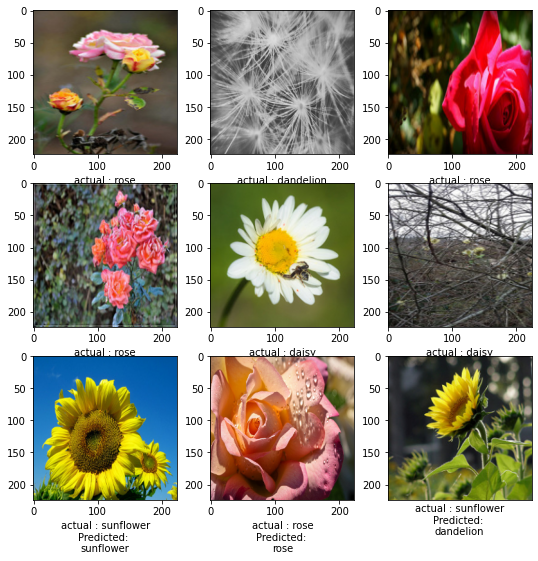

In [ ]:
prediction = model.predict(X_test)

plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_test[i])
  
  plt.xlabel('actual : '+categories[y_test[i]]+'\n'+'Predicted: \n'+
             categories[np.argmax(prediction[i])])
  print('\n')
plt.xticks([])

plt.show()
